In [2]:
import pandas as pd
import numpy as np
import string

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)

from IPython.display import SVG
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pd.reset_option = 'all'
pd.set_option('max_colwidth', 100)

In [3]:
recipe_all = pd.read_csv('recipe_data_preprocessed.csv')

recipe_all.shape

(1872, 12)

In [4]:
recipe_all.head(1)
recipe_all.head(1).applymap(type)

,publishdate,content_id,title_en,difficulty,mealtype,diettype,cuisine,cooking_method,steps,ingredients,#ingredients,steps_length
0,2017-04-29,R702,Braised chicken with couscous,medium,main,non-vegetarian,african,"marinating,roasting,slow-cooking,steaming","Wash and dry chicken legs. Mix a part of rapeseed oil with honey until smooth. Add turmeric, cum...","['chicken legs', 'chicken stock (divided)', 'couscous', 'cumin', 'garlic', 'green bell pepper', ...",18,158


,publishdate,content_id,title_en,difficulty,mealtype,diettype,cuisine,cooking_method,steps,ingredients,#ingredients,steps_length
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>


In [5]:
recipe_text = recipe_all.iloc[:,1:-2]

In [6]:
recipe_text.steps[1868]

'Slice bok choy into thin strips and scallions into rings. Peel mango and dice. Mince garlic, ginger, and chili. Juice lime. To make the sesame crunch, caramelize the sugar in a saucepan. Add white and black sesame seeds and stir to combine. Transfer to a silicone baking mat and spread into a thin, even layer. Let cool then break into pieces with your hands. To make the dressing, add miso paste, toasted sesame oil, soy sauce, rice vinegar, lime juice, and honey to a bowl. Add minced garlic, ginger, and chili and mix well to combine. Mix the bok choy, scallions, and mango with the dressing and sprinkle with sesame crunch. Enjoy!'

In [7]:
# !pip3 install spacy
# !python3 -m spacy download en_core_web_md
import spacy
nlp  = spacy.load('/usr/local/lib/python3.7/site-packages/en_core_web_md/en_core_web_md-2.2.5')

In [8]:
# Clean the text
# With spaCy loaded, the documents can be lemmatised.

def keep_token(t):
    return (t.is_alpha and 
            not (t.is_space or t.is_punct or 
                 t.is_stop or t.like_num))

def lemmatize_doc(doc):
#     lower_t =  [t.lower_ for t in doc if keep_token(t)]
    return [ t.lemma_ for t in doc if keep_token(t)]


In [9]:
# lemmatize_doc(nlp(recipe_text.steps[1868]))

In [10]:
# the step text now convert to a list of word
recipe_text['steps'] = recipe_text['steps'].apply(lambda x: lemmatize_doc(nlp(x.lower())))

In [11]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 5, 'max_colwidth', 100):
    recipe_text.head()

,content_id,title_en,...,steps,ingredients
0,R702,Braised chicken with couscous,...,"[wash, dry, chicken, leg, mix, rapeseed, oil, honey, smooth, add, turmeric, cumin, cinnamon, spi...","['chicken legs', 'chicken stock (divided)', 'couscous', 'cumin', 'garlic', 'green bell pepper', ..."
1,R1295,East African-style coconut chicken,...,"[debone, chicken, leg, set, bone, aside, later, use, chop, chicken, chunk, season, half, salt, s...","['canned crushed tomatoes', 'chicken legs', 'cinnamon', 'coconut milk', 'curry powder', 'garam m..."
2,R943,Lamb and quince tagine,...,"[trim, cut, lamb, medium, sized, piece, peel, quarter, core, quince, cut, quince, medium, sized,...","['butter', 'cilantro for garnishing', 'ground cinnamon', 'ground ginger', 'ground turmeric', 'ho..."
3,R574,Moroccan-inspired chickpea stew,...,"[peel, finely, dice, onion, garlic, peel, carrot, sweet, potato, cut, bite, size, piece, deseed,...","['apple cider vinegar (optional)', 'black pepper', 'canned chopped tomatoes', 'carrots', 'cayenn..."
4,C27,Fudgy cardamom banana bread,...,"[boil, oats, clove, cardamom, remove, spice, set, aside, bowl, whisk, butter, honey, whiskey, va...","['baking soda', 'bananas (overripe)', 'butter for greasing', 'butter (soft, divided)', 'cardamom..."


In [12]:
# with tqdm we can get the frequency of each word in the whole recipe corpus,
# we do this in order to set the parameters for using the Keras inbuilt Tokenizer class

from tqdm import tqdm
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

vocab = build_vocab(recipe_text.steps.tolist())
import operator
sorted_vocab = sorted(vocab.items(), key=operator.itemgetter(1), reverse=True)
print('unique word in the corpus: ', len(sorted_vocab))
sorted_vocab[:10]
sorted_vocab[-10:]

100%|██████████| 1872/1872 [00:00<00:00, 69907.56it/s]

unique word in the corpus:  3645


[('add', 5053),
 ('approx', 3924),
 ('min', 3696),
 ('heat', 2668),
 ('salt', 2235),
 ('bowl', 1956),
 ('pan', 1867),
 ('pepper', 1651),
 ('oven', 1638),
 ('oil', 1508)]

[('coupé', 1),
 ('tomatoes', 1),
 ('catalana', 1),
 ('bruise', 1),
 ('happen', 1),
 ('sirloin', 1),
 ('sharpness', 1),
 ('build', 1),
 ('scum', 1),
 ('infuser', 1)]

In [13]:
# now we convert the step text as list back to text in order to use Tokeniser()
def list_to_text(list):
    text = " ".join(str(x) for x in list)
    return text
recipe_text['steps_text'] = recipe_text['steps'].apply(list_to_text)

In [14]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 10, 'max_colwidth', 100):
    recipe_text.head(1)

,content_id,title_en,difficulty,mealtype,diettype,cuisine,cooking_method,steps,ingredients,steps_text
0,R702,Braised chicken with couscous,medium,main,non-vegetarian,african,"marinating,roasting,slow-cooking,steaming","[wash, dry, chicken, leg, mix, rapeseed, oil, honey, smooth, add, turmeric, cumin, cinnamon, spi...","['chicken legs', 'chicken stock (divided)', 'couscous', 'cumin', 'garlic', 'green bell pepper', ...",wash dry chicken leg mix rapeseed oil honey smooth add turmeric cumin cinnamon spicy paprika sal...


In [15]:
# get max recipe step_text length
length = recipe_text['steps'].apply(len)
length.max()

395

In [16]:
recipe_text.steps_text[0]
# recipe_text.steps_text.values

'wash dry chicken leg mix rapeseed oil honey smooth add turmeric cumin cinnamon spicy paprika salt pepper large bowl freezer bag toss chicken leg marinade seal cover marinate overnight refrigerator peel slice onion garlic remove chicken leg marinade carefully drain heat oil tagine medium high heat add chicken leg garlic onion fry deep golden brown side deglaze chicken stock place lid tagine let simmer approx min meantime wash bell pepper remove seed cut strip rinse raisin cold water add cut bell pepper raisin couscous remain chicken stock tagine cover continue simmer approx min season lemon juice salt pepper garnish parsley serve directly tagine enjoy'

In [18]:
from numpy import asarray
from numpy import zeros
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Input, LSTM, Embedding, Dropout, Activation, Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
docs = recipe_text['steps_text'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
# word - encode_id dictionary starting from 1
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index))


Found 3645 unique tokens.


In [20]:
input_text = tokenizer.texts_to_sequences(docs)

# pad documents to a max length of max recipe step text(395 word)
input_text = pad_sequences(input_text)
input_text.shape
# input_text[0]

(1872, 395)

In [21]:
recipe_text[recipe_text['diettype'].isna()].index
recipe_text[recipe_text['cuisine'].isna()].index #too many na's for cuisine not using it for tagging
recipe_text[recipe_text['mealtype'].isna()].index

Int64Index([  70,  108,  112,  116,  132,  133,  149,  154,  155,  158,
            ...
            1754, 1760, 1773, 1778, 1779, 1784, 1803, 1827, 1864, 1866],
           dtype='int64', length=157)

Int64Index([ 932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
            ...
            1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638],
           dtype='int64', length=707)

Int64Index([], dtype='int64')

In [22]:
# recipe_text = recipe_text_all
recipe_text.shape

(1872, 10)

In [23]:
nna_index = recipe_text[~recipe_text['diettype'].isna()].index
na_index = recipe_text[recipe_text['diettype'].isna()].index

In [24]:
# save a copy
recipe_text_all = recipe_text
input_text_all = input_text

In [25]:
recipe_text = recipe_text[~recipe_text['diettype'].isna()]

In [26]:
input_text = input_text[nna_index]

In [27]:
input_text.shape
recipe_text.shape

(1715, 395)

(1715, 10)

In [28]:
list(recipe_text.diettype.unique())
list(recipe_text.mealtype.unique())
# recipe_text[recipe_text['mealtype']=='others'].index
# list(recipe_text['cuisine'].unique())
len(list(recipe_text['cuisine'].unique()))

['non-vegetarian', 'vegetarian', 'alcoholic', 'alcohol-free']

['main', 'dessert', 'others', 'drinks', 'salad', 'soup']

16

In [29]:
# Define the dimension(EMBEDDING_DIM) of the word vector, and input length (MAX_DOC_LENGTH) 
# of each recipe.
vocab_size = len(word_index)
EMBEDDING_DIM = 100
MAX_DOC_LENGTH = 395 
vocab_size

3645

In [ ]:
# model without pre-trained word embedding, self-train embedding for each word
input_layer = Input(shape=(395,))
embedding_layer = Embedding(vocab_size+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_DOC_LENGTH)

_ = embedding_layer(input_layer)
_ = SpatialDropout1D(0.2)(_)
_ = LSTM(100, dropout=0.2, recurrent_dropout=0.2, 
         activity_regularizer=regularizers.l2(0.01))(_)

difficulty_output = Dense(units=3, activation='softmax', name='difficulty_output')(_)
mealtype_output = Dense(units=6, activation='softmax', name='mealtype_output')(_)
diettype_output = Dense(units=4, activation='softmax', name='diettype_output')(_)

model = Model(inputs=input_layer, outputs=[difficulty_output, mealtype_output, diettype_output])

model.compile(optimizer='adam', 
              loss={'difficulty_output': 'categorical_crossentropy', 'mealtype_output': 'categorical_crossentropy', 'diettype_output': 'categorical_crossentropy'},
              loss_weights={'difficulty_output': 0.2, 'mealtype_output': 0.5, 'diettype_output': 0.3},
              metrics={'difficulty_output': 'accuracy', 'mealtype_output': 'accuracy', 'diettype_output':'accuracy'})


model.summary()


In [ ]:
# Define the multi-output target
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
lb = LabelBinarizer()
l_difficulty = lb.fit_transform(recipe_text['difficulty'].values)
l_difficulty.shape
l_mealtype = lb.fit_transform(recipe_text['mealtype'].values)
l_mealtype.shape
l_diettype = lb.fit_transform(recipe_text['diettype'].values)
l_diettype.shape
labels_3 = np.hstack((l_difficulty, l_mealtype, l_diettype))
labels_3.shape

X_train, X_test, Y_train, Y_test = train_test_split(input_text,labels_3, test_size = 0.10, random_state = 1234)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
difficulty_train = Y_train[:,0:3]
mealtype_train = Y_train[:,3:9]
diettype_train = Y_train[:,9:13]

In [ ]:
difficulty_test = Y_test[:,0:3]
mealtype_test = Y_test[:,3:9]
diettype_test = Y_test[:,9:13]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_chk_path = 'Recipe_Embedding_Model/model/'+'recipe_emb_100_h_100_'+'{epoch:03d}.hdf5'
epochs = 10
batch_size = 16
# best_val_acc = 0
mcp = ModelCheckpoint(model_chk_path, monitor="val_mealtype_output_accuracy",verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max')

history = model.fit(X_train, [difficulty_train, mealtype_train, diettype_train], epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,
#                     callbacks=[callbacks]
                    callbacks=[mcp]
                   )


In [30]:
from tensorflow.keras.models import Model, load_model, save_model

model = load_model('Recipe_Embedding_Model/recipe_emb_100_h_100_006.hdf5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 395)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 395, 100)     364600      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 395, 100)     0           embedding[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 100)          80400       spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [31]:
for i, layer in enumerate(model.layers):
   print(i, layer.name, 
         layer.input_shape,
         layer.output_shape)

0 input_1 [(None, 395)] [(None, 395)]
1 embedding (None, 395) (None, 395, 100)
2 spatial_dropout1d (None, 395, 100) (None, 395, 100)
3 lstm (None, 395, 100) (None, 100)
4 difficulty_output (None, 100) (None, 3)
5 mealtype_output (None, 100) (None, 6)
6 diettype_output (None, 100) (None, 4)


In [32]:
lstm_weight = model.layers[3].get_weights()

In [33]:
# this is the weight matrix for lstm layer, we need the output of the LSTM layer
for i in range(len(lstm_weight)):
    print(lstm_weight[i].shape)

(100, 400)
(100, 400)
(400,)


In [34]:
input_text.shape
recipe_text.shape
input_text_all.shape

(1715, 395)

(1715, 10)

(1872, 395)

In [35]:
intermediate_model = Model(inputs=model.layers[0].input, 
                              outputs=[l.output for l in model.layers[1:4]])
# Now we input all the recipes(including diettag is None, and get the output of hiddenstate)
intermediate_output = intermediate_model.predict(input_text_all)
# len(intermediate_output)
intermediate_output[2].shape

lstm_output = intermediate_output[2]

(1872, 100)

In [36]:
pd.DataFrame(lstm_output).shape

(1872, 100)

In [ ]:
pd.DataFrame(lstm_output).to_csv(r'Recipe_Embedding_Model/recipe_emb100_lstm100_all.csv', index = None, header=False)

In [37]:
# create recipe-embedding dictionary
# read mapping dic from RNN-model
item_id_mapping = pd.read_csv("Recipe_Embedding_Model/item_id_mapping", sep='\t')
item_id_mapping.columns = ['content_id', 'rid']
recipe_input_with_rid = recipe_text_all.merge(item_id_mapping, 'left', on='content_id')

In [38]:
item_id_mapping.shape
recipe_input_with_rid.shape
# make sure all recipes in interaction dataset are in recipe_text_all
recipe_input_with_rid[~recipe_input_with_rid.rid.isna()].shape

(1477, 2)

(1872, 11)

(1477, 11)

In [39]:
# recipe_mapping.rid.astype('int32',  copy=False )
contentid2rid = recipe_input_with_rid[['content_id', 'rid']]

In [40]:
# the index of the recipe_text is in order with the recipe input order, so extract the index as a column
input_index_rid = contentid2rid.rid.reset_index()
# input_index_rid

# select recipes that appeared in RNN interaction dataset
input_index_rid = input_index_rid[~input_index_rid['rid'].isna()]
input_index_rid.shape

input_index_rid.rid = input_index_rid.rid.astype('int32')
input_index_rid = input_index_rid.sort_values('rid')
input_index_rid.shape

(1477, 2)

(1477, 2)

In [41]:
rid_to_embedding = {}
for i in input_index_rid.rid.tolist():
#     print(i)
    row_index_for_emb_matrix = input_index_rid[input_index_rid.rid == i]['index'].values[0]
#     print(row_index_for_emb_matrix)
    rid_to_embedding[i] = lstm_output[row_index_for_emb_matrix] 

In [42]:
len(rid_to_embedding.keys())

1477

In [43]:
# transform dict to embedding matrix

recipe_embedding_matrix = zeros((len(rid_to_embedding.keys()), 100))

for i, embedding_vector in rid_to_embedding.items():
	if embedding_vector is not None:
		recipe_embedding_matrix[i] = embedding_vector

recipe_embedding_matrix.shape

(1477, 100)

In [ ]:
# save the lstm-hidden-state recipe embedding
pd.DataFrame(recipe_embedding_matrix).to_csv(r'Recipe_Embedding_Model/recipe_lstm_emb100.csv', index = None, header=False)

In [50]:
recipe_embedding_lstm = pd.read_csv('Recipe_Embedding_Model/recipe_emb100_lstm100_all.csv', header = None)

In [51]:
recipe_embedding_lstm.shape

(1872, 100)

In [53]:
from sklearn.decomposition import PCA
emb_pca = PCA(n_components=8).fit_transform(recipe_embedding_lstm)
emb_pca.shape

(1872, 8)

In [54]:
from sklearn import manifold

tsne = manifold.TSNE()
viz = tsne.fit_transform(emb_pca)
viz.shape

(1872, 2)

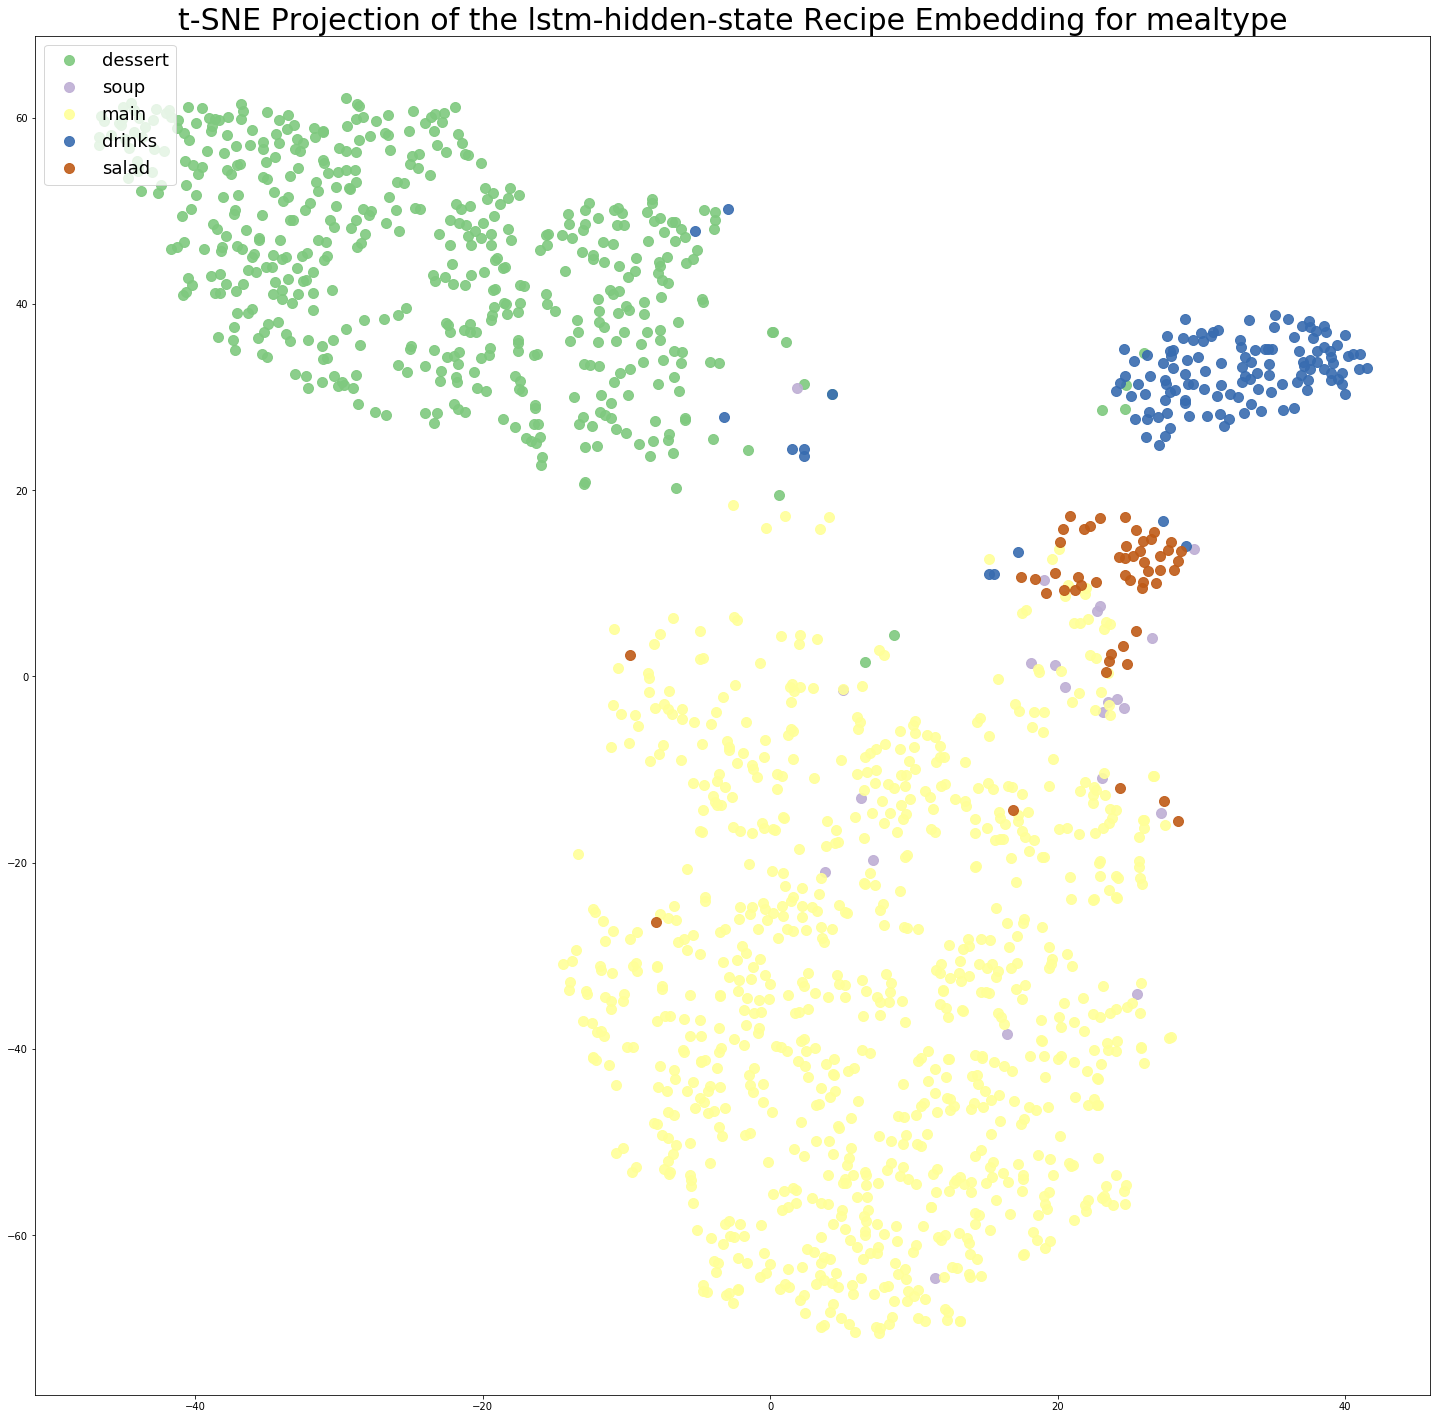

In [74]:
InteractiveShell.ast_node_interactivity = "last"
plt.rcParams['figure.figsize'] = (25,25)
fig, ax = plt.subplots()
ax.margins(0.05) 


uniq = list(set(recipe_text_all[recipe_text_all['mealtype']!= 'others'].mealtype))
uniq

hot = plt.get_cmap('Accent')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)


for i in range(len(uniq)):
    indx = np.where(recipe_text_all.mealtype == uniq[i])[0]
    indexs = recipe_text_all['title_en'][indx].index
    titles = recipe_text_all['title_en'][indx].values
#     plt.scatter(viz[indx,0], viz[indx,1], s=15, color=scalarMap.to_rgba(i), label=i)
    ax.plot(viz[indx,0], viz[indx,1], marker='o', linestyle='', ms=10, color=scalarMap.to_rgba(i), 
            alpha=0.9, label=uniq[i])

#     for j, value in enumerate(zip(indexs, titles)):
#         text_x = viz[value[0],0]
#         text_y = viz[value[0],1]
#         if ((uniq[i] == 'vegetarian' and text_x < 0 and text_y <0) 
#                     or (uniq[i] == 'non-vegetarian' and text_x > 0 and text_y >0)):
#     #             ax.annotate(value[1], (viz[value[0],0], viz[value[0],1]))
#             plt.text(text_x-2, text_y + 0.5, value[1], fontsize = 14);
plt.legend(loc='upper left',fontsize=18)
plt.title('t-SNE Projection of the lstm-hidden-state Recipe Embedding for mealtype', fontsize=30)
plt.show()


### Get self-trained word vector and generate TF-IDF weighted recipe embedding

In [44]:
embedding_own = model.layers[1].get_weights()[0]
embedding_own.shape

(3646, 100)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# len(word_index.keys())
# there is no word for 'na' in keras generated word_index, so we manually add that so that the two dictionaries
# have the save amount of words
word_index['na']=0
word_index['na']

tfidf = TfidfVectorizer(vocabulary=word_index)

tfidf_emb_vecs = tfidf.fit_transform(recipe_text_all['steps_text'].values)
tfidf_emb_vecs.shape

3645

0

(1872, 3646)

In [67]:
from scipy.sparse import csr_matrix

recipe_embedding_tfidf = tfidf_emb_vecs.dot(embedding_own)

In [76]:
# save the tf-idf recipe embedding for all recipes
pd.DataFrame(recipe_embedding_tfidf).to_csv(r'Recipe_Embedding_Model/recipe_emb100_tfidf100_all.csv', index = None, header=False)

In [68]:
# type(recipe_emb_tfidf)
recipe_embedding_tfidf.shape

(1872, 100)

In [60]:
# create recipe-embedding dictionary
# read mapping dic 
item_id_mapping = pd.read_csv('Recipe_Embedding_Model/item_id_mapping', sep='\t')
item_id_mapping.columns = ['content_id', 'rid']
recipe_input_with_rid = recipe_text_all.merge(item_id_mapping, 'left', on='content_id')

item_id_mapping.shape
contentid2rid = recipe_input_with_rid[['content_id', 'rid']]
contentid2rid.shape
# all recipes in ks-cooks-1y are in recipe_text_all
recipe_input_with_rid[~recipe_input_with_rid.rid.isna()].shape

(1477, 11)

In [62]:
contentid2rid = recipe_input_with_rid[['content_id', 'rid']]
# contentid2rid

# the index of the recipe_text is in order with the recipe input order, so extract the index as a column
input_index_rid = contentid2rid.rid.reset_index()
# input_index_rid

# select recipes that appeared in RNN interaction dataset
input_index_rid = input_index_rid[~input_index_rid['rid'].isna()]
input_index_rid.shape

input_index_rid.rid = input_index_rid.rid.astype('int32')
input_index_rid = input_index_rid.sort_values('rid')
input_index_rid.shape

(1477, 2)

In [63]:
rid_to_embedding = {}
for i in input_index_rid.rid.tolist():
#     print(i)
    row_index_for_emb_matrix = input_index_rid[input_index_rid.rid == i]['index'].values[0]
#     print(row_index_for_emb_matrix)
    rid_to_embedding[i] = recipe_emb_tfidf[row_index_for_emb_matrix]

In [65]:
# transform dict to embedding matrix

recipe_embedding_input_tfidf = zeros((len(rid_to_embedding.keys()), 100))

for i, embedding_vector in rid_to_embedding.items():
	if embedding_vector is not None:
		recipe_embedding_input_tfidf[i] = embedding_vector

recipe_embedding_input_tfidf.shape

(1477, 100)

In [69]:
# save the tf-idf recipe embedding for the recipes in interaction dataset
np.savetxt("Recipe_Embedding_Model/recipe_tfidf_emb100.csv", recipe_embedding_input_tfidf, delimiter=",")

In [70]:
# plot all recipes with their tf-idf embedding
recipe_embedding_tfidf.shape

(1872, 100)

In [71]:
from sklearn.decomposition import PCA
emb_pca = PCA(n_components=8).fit_transform(recipe_embedding_tfidf)
from sklearn import manifold

tsne = manifold.TSNE()
viz = tsne.fit_transform(emb_pca)

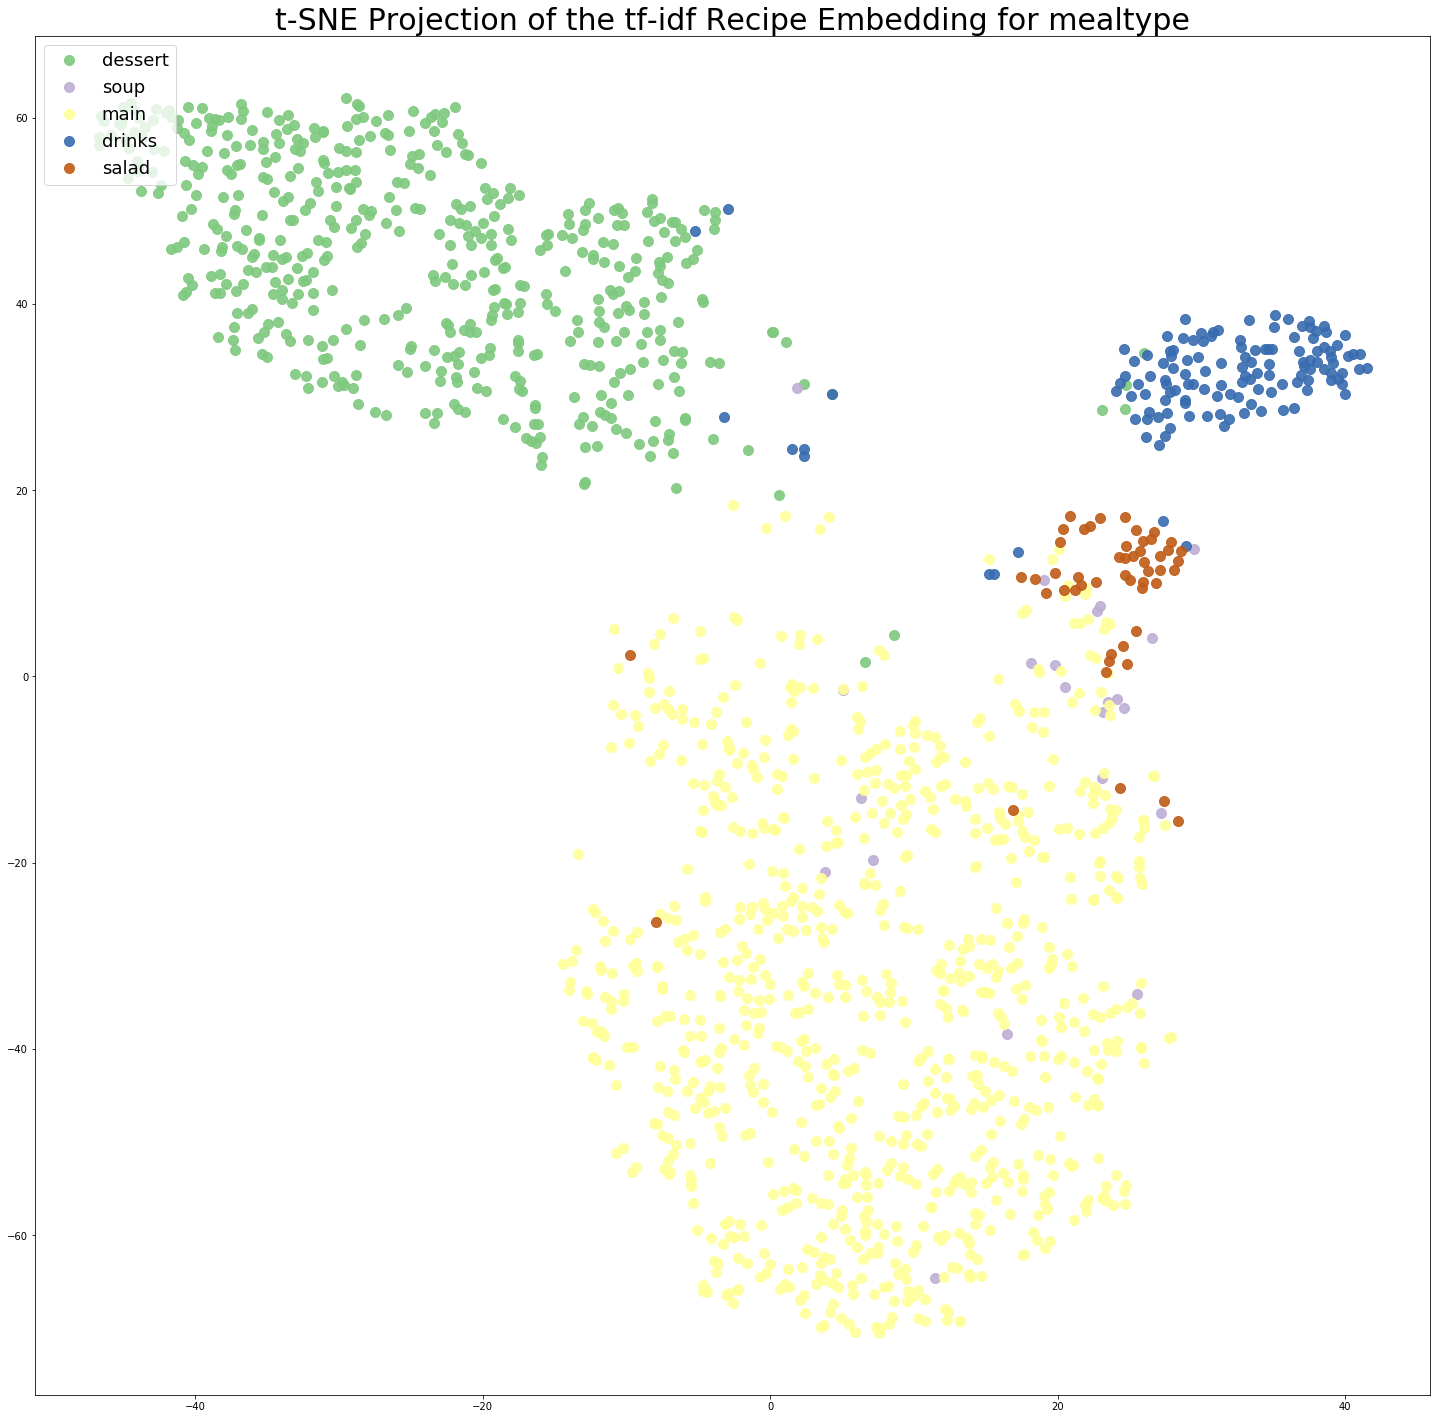

In [73]:
InteractiveShell.ast_node_interactivity = "last"

plt.rcParams['figure.figsize'] = (25,25)
fig, ax = plt.subplots()
ax.margins(0.05) 


uniq = list(set(recipe_text_all[recipe_text_all['mealtype']!= 'others'].mealtype))
uniq

hot = plt.get_cmap('Accent')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)


for i in range(len(uniq)):
    indx = np.where(recipe_text_all.mealtype == uniq[i])[0]
    indexs = recipe_text_all['title_en'][indx].index
    titles = recipe_text_all['title_en'][indx].values
#     plt.scatter(viz[indx,0], viz[indx,1], s=15, color=scalarMap.to_rgba(i), label=i)
    ax.plot(viz[indx,0], viz[indx,1], marker='o', linestyle='', ms=10, color=scalarMap.to_rgba(i), 
            alpha=0.9, label=uniq[i])

#     for j, value in enumerate(zip(indexs, titles)):
#         text_x = viz[value[0],0]
#         text_y = viz[value[0],1]
#         if ((uniq[i] == 'vegetarian' and text_x < 0 and text_y <0) 
#                     or (uniq[i] == 'non-vegetarian' and text_x > 0 and text_y >0)):
#     #             ax.annotate(value[1], (viz[value[0],0], viz[value[0],1]))
#             plt.text(text_x-2, text_y + 0.5, value[1], fontsize = 14);
plt.legend(loc='upper left',fontsize=18)
plt.title('t-SNE Projection of the tf-idf Recipe Embedding for mealtype', fontsize=30)
plt.show()
